In [9]:
import numpy as np
import pandas as pd
from scipy.stats import skew, entropy
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
wine_df = pd.read_csv('winequality-red.csv',sep=";")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
stats = pd.DataFrame()

stats['Median'] = wine_df.median()
stats['Range'] = wine_df.max() - wine_df.min()
stats['IQR'] = wine_df.quantile(0.75) - wine_df.quantile(0.25)
stats['variance'] = wine_df.var()
stats['Skewness'] = wine_df.skew()
stats['Entropy'] = wine_df.apply(lambda x: entropy(x.value_counts()))
stats

,Median,Range,IQR,variance,Skewness,Entropy
fixed acidity,7.90000,11.30000,2.100000,3.031416,0.982751,4.119087
volatile acidity,0.52000,1.46000,0.250000,0.032062,0.671593,4.427670
citric acid,0.26000,1.00000,0.330000,0.037947,0.318337,4.071319
residual sugar,2.20000,14.60000,0.700000,1.987897,4.540655,3.310424
chlorides,0.07900,0.59900,0.020000,0.002215,5.680347,4.308104
free sulfur dioxide,14.00000,71.00000,14.000000,109.414884,1.250567,3.518974
total sulfur dioxide,38.00000,283.00000,40.000000,1082.102373,1.515531,4.576161
density,0.99675,0.01362,0.002235,0.000004,0.071288,5.514945
pH,3.31000,1.27000,0.190000,0.023835,0.193683,4.094183
sulphates,0.62000,1.67000,0.180000,0.028733,2.428672,3.972864


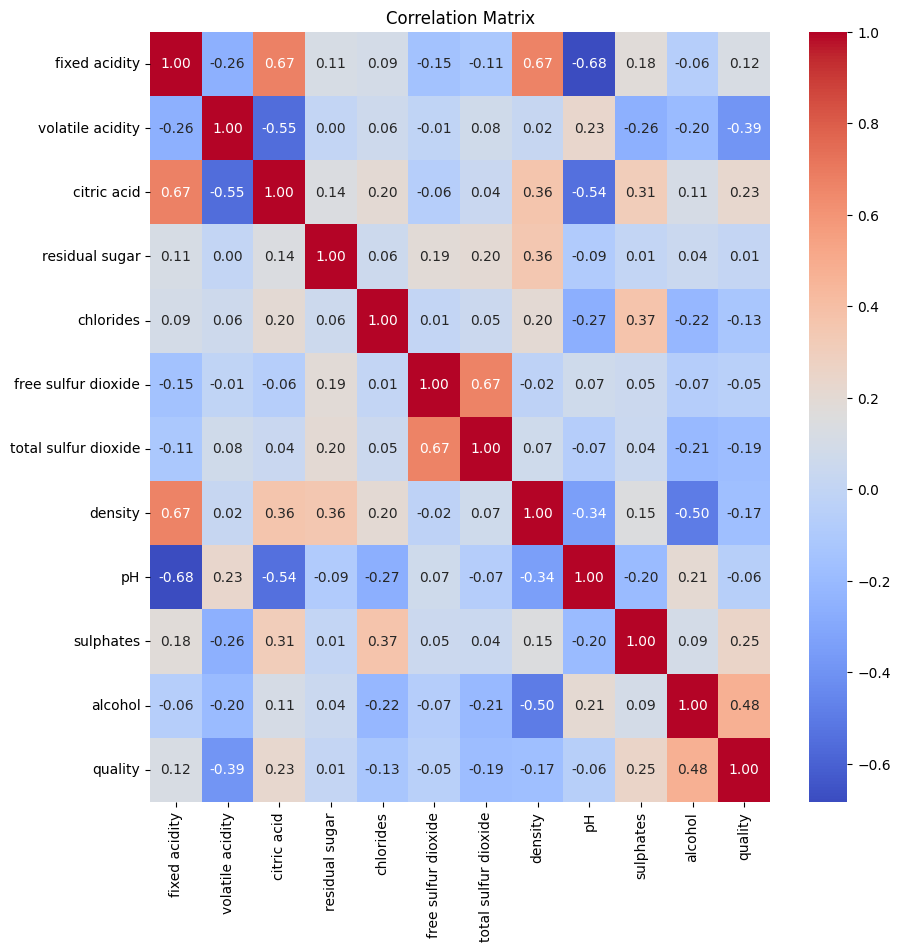

In [15]:
corr_df = wine_df.corr()
plt.figure(figsize=(10, 10))  
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

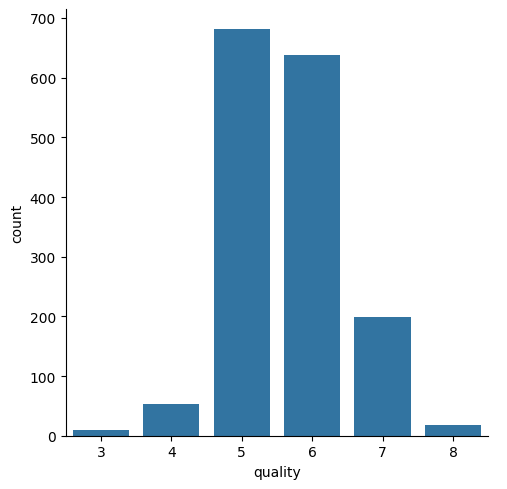

In [16]:
wine_df['quality'].value_counts()
sns.catplot(x='quality', data= wine_df, kind='count' )

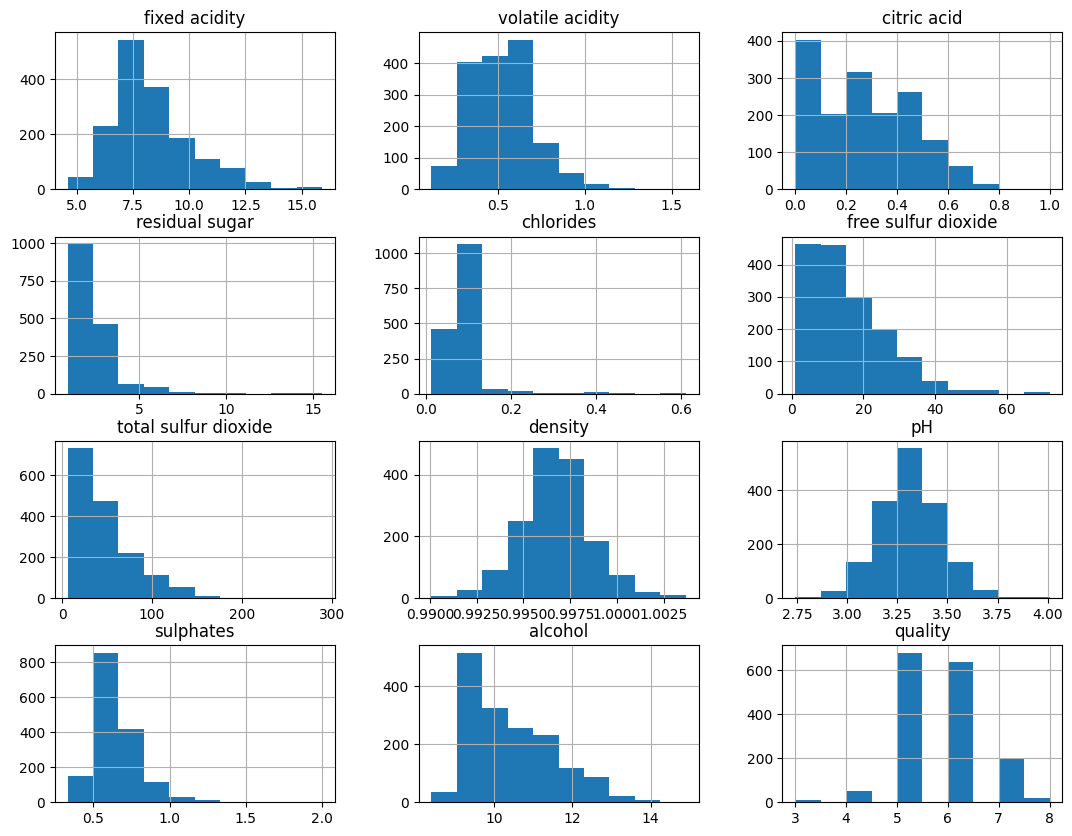

In [28]:
wine_df.hist(bins=10, figsize=(13,10))
plt.show()

In [17]:
X = wine_df.drop('quality',axis=1)
y = wine_df['quality'].apply(lambda y_value:  1 if y_value >=7 else 0)

In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [19]:
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

applying random forest classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       283
           1       0.80      0.65      0.72        37

    accuracy                           0.94       320
   macro avg       0.88      0.81      0.84       320
weighted avg       0.94      0.94      0.94       320



In [23]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

dropping features with highest variance: total sulfur dioxide

In [24]:
X_drp_var = X.drop(['total sulfur dioxide'], axis=1)
X_drp_var.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4


In [25]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_drp_var, y, test_size = 0.2, random_state = 3)

In [26]:
model1 = RandomForestClassifier()
model1.fit(X_train1, y_train1)

RandomForestClassifier()

In [27]:
y_pred1 = model1.predict(X_test1)

In [28]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       283
           1       0.71      0.54      0.62        37

    accuracy                           0.92       320
   macro avg       0.83      0.76      0.79       320
weighted avg       0.92      0.92      0.92       320



dropping feature with highest entropy: density

In [29]:
X_drp_ent = X.drop(['density'], axis=1)
X_drp_ent.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4


In [30]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_drp_ent, y, test_size = 0.2, random_state = 3)

In [31]:
model2 = RandomForestClassifier()
model2.fit(X_train2, y_train2)

RandomForestClassifier()

In [32]:
y_pred2 = model2.predict(X_test2)

In [33]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       283
           1       0.81      0.59      0.69        37

    accuracy                           0.94       320
   macro avg       0.88      0.79      0.83       320
weighted avg       0.93      0.94      0.93       320



In [34]:
X_drp_alc = X.drop(['alcohol'], axis=1)
X_drp_alc.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56


In [35]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_drp_alc, y, test_size = 0.2, random_state = 3)

In [36]:
model3 = RandomForestClassifier()
model3.fit(X_train3, y_train3)

RandomForestClassifier()

In [37]:
y_pred3 = model3.predict(X_test3)

In [38]:
print(classification_report(y_test3,y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       283
           1       0.83      0.54      0.66        37

    accuracy                           0.93       320
   macro avg       0.89      0.76      0.81       320
weighted avg       0.93      0.93      0.93       320

